In [1]:
import os
from pathlib import Path

In [2]:
DATA_PATH = Path.home() / "data" / "BTCUSDT"
CONFIG_PATH = Path("./config/").resolve()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [4]:
with open(CONFIG_PATH / "default.json", "r") as f:
    config = json.load(f)

config

{'env': 'TradingEnv-v1',
 'env_config': {'fee': 0.0001,
  'observer': {'type': 'PublicObserver',
   'kwargs': {'df_path': None, 'window_size': 30}},
  'actions': {'type': 'MarketOrder', 'kwargs': {}},
  'rewards': {'type': 'DSR', 'kwargs': {'window_size': 30}},
  'informer': {'type': 'PrivateInformer', 'kwargs': {}},
  'stopper': {'type': 'DrawdownStopper', 'kwargs': {'allowable_drawdown': 0}}},
 'evaluation_config': {'env_config': {}, 'explore': False},
 'evaluation_interval': None,
 'evaluation_duration': 1,
 'evaluation_parallel_to_training': False,
 'min_train_timesteps_per_iteration': None,
 'min_sample_timesteps_per_iteration': None,
 'min_time_s_per_iteration': None,
 'log_level': 'WARN',
 'framework': 'torch',
 'callbacks': None,
 'model': {},
 'seed': 3407}

In [5]:
config["env_config"]["observer"]["kwargs"]["df_path"] = str(DATA_PATH / "ohlcv_with_features" / "4H_train.pkl")

In [6]:
from rl_bot.envs.environment import TradingEnv

In [7]:
env = TradingEnv(config["env_config"])

In [8]:
n_samples = 3
# print(hist_samples)
samples = []
for i in range(n_samples):
    env.reset()
    done = False
    hist = {"reward": [], "action": [], "price": []}
    dsr = {"a_t": [], "b_t": []}
    while not done:
        action = i
        if i == 2:
            action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        hist["reward"].append(reward)
        hist["action"].append(action)
        hist["price"].append(env.observer.price)

        dsr["a_t"].append(env.rewards.a_t)
        dsr["b_t"].append(env.rewards.b_t)

    df = pd.DataFrame(hist)
    samples.append(df)

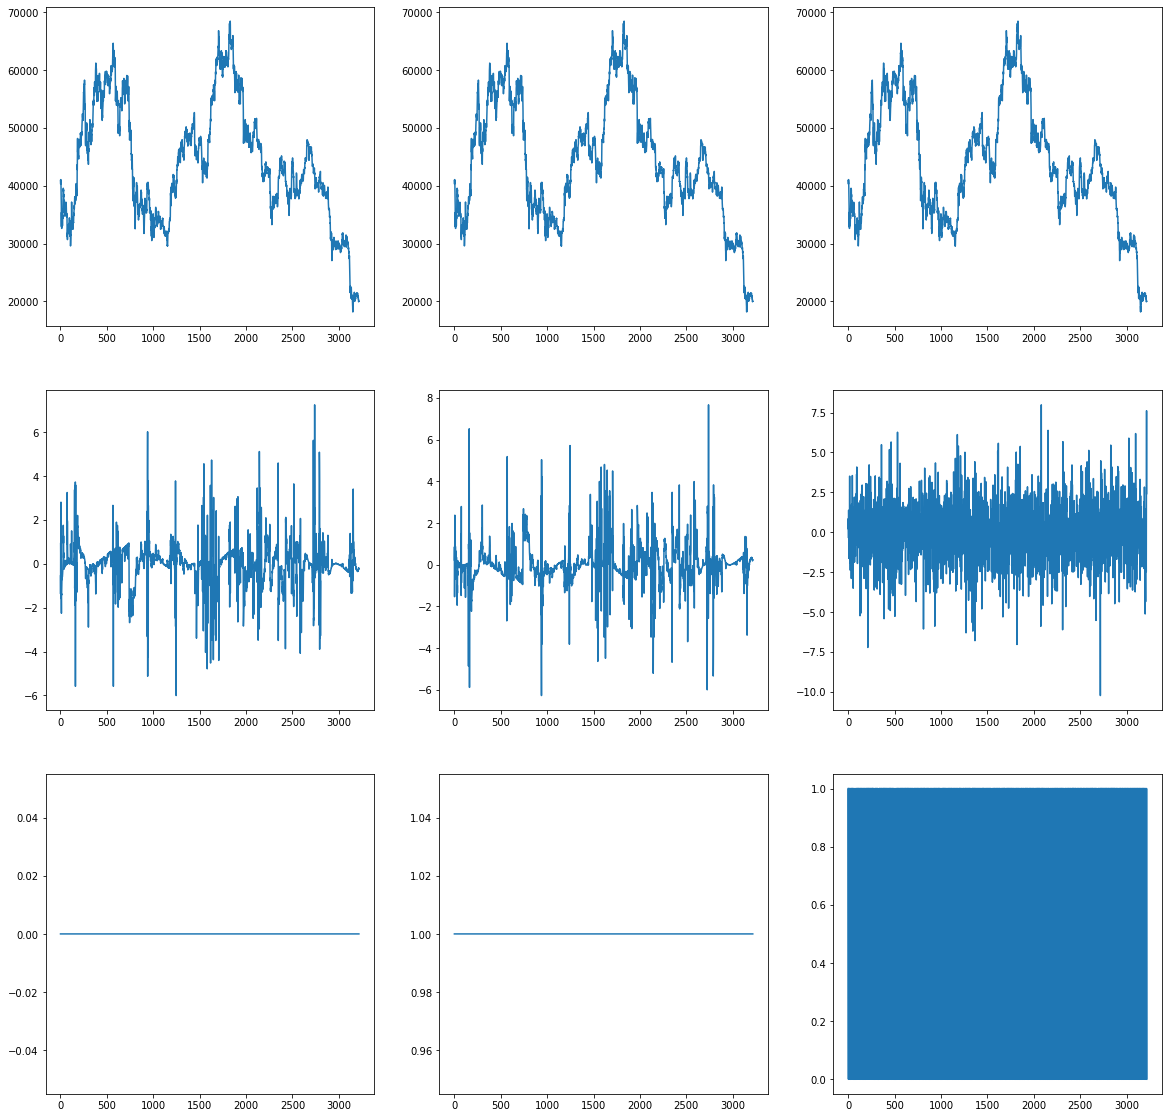

In [9]:
fig, ax = plt.subplots(3, n_samples, figsize=(20, 20))
for i in range(n_samples):
    ax[0][i].plot(samples[i]["price"])
    ax[1][i].plot(samples[i]["reward"])
    ax[2][i].plot(samples[i]["action"])

In [10]:
import random
df = samples[-1]
df

,reward,action,price
0,0.224075,1,40885.000000
1,0.858369,0,40672.300000
2,-0.100061,0,40280.000000
3,-0.360151,1,41062.500000
4,1.379813,0,40942.500000
...,...,...,...
3213,-2.470869,0,20330.500000
3214,0.555049,0,19941.166667
3215,1.135117,0,20091.500000
3216,7.614093,1,20110.500000


In [11]:
df.describe().loc[["25%", "75%"], "reward"]

25%   -0.906333
75%    0.904313
Name: reward, dtype: float64

<AxesSubplot:>

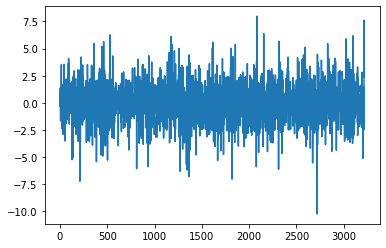

In [12]:
df["reward"].plot()

<AxesSubplot:>

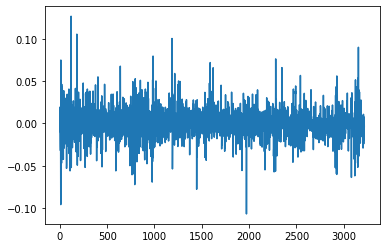

In [13]:
returns = df["price"].pct_change()
returns.plot()

<AxesSubplot:>

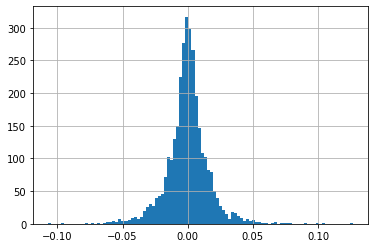

In [14]:
returns.hist(bins=100)

<AxesSubplot:>

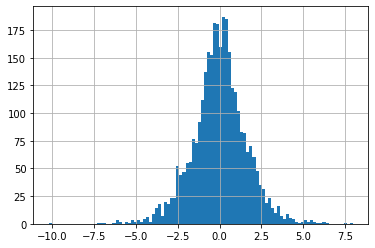

In [15]:
df["reward"].hist(bins=100)

In [16]:
samples[1]["reward"].sum()

25.428664911204493

<AxesSubplot:>

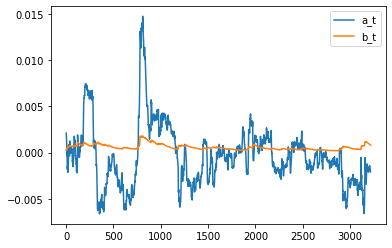

In [17]:
tmp = pd.DataFrame(dsr)
tmp.plot()